<a href="https://colab.research.google.com/github/Ben-Judas/Capstone-s-Project/blob/main/Contraception_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

<font color='pink'> <div style="text-align: justifie"> **To highlight the determinants of modern contraceptive practice among married women who were not pregnant during 2016-2017**</p></font>

<font color='pink'> <div style="text-align: justifie">**To identify the determinants of modern contraceptive practice among married women who are not pregnant during the period 2016-2017. The project starts from the observation that the contraceptive demand is unsatisfactory with a low satisfaction rate of 72%, exacerbated by the lack of access to health care. In particular, the proportion of women in union using contraception has increased from 22% in 2000 to 32% in 2016. Despite all this, Haiti remains the country with the highest level of unmet need for family planning and the lowest use of modern contraception in the Latin America and Caribbean region. For personal reasons, this project targets married women who were not expecting children at the time of the survey. In fact, only 35% of currently married women use any method, and of these, 31% use a modern method**.</div>

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

 <font color='pink'>**My project aims to question married women's choice to use modern contraceptive methods. In other words, does any socio-economic characteristics of the household influence the choice of women using modern contraceptive methods ?**

# Data Source
Explain where did you get the data. How can you trust this data? Who produced this data and what were their motiviations?

<font color='pink'>**The data that will be used comes from the Mortality, Morbidity and Service Utilization Survey (EMMUS VI) conducted in 2016. These data are available upon request from the Ministry of Public Health and Population (MPHP). During this project, we will be required to use EDA process with bivariate test to find insights about what could motivate married woman to use modern contraceptive method.**
**Then, a Machine Learning process to modelling the available data**


# Data Cleaning
In this step you will prepare your data for analysis.

## Review data types
Inspect the dataset for the data types of each column.

## Analytical Transformations
Perform any transformation on the columns in the dataset to enable further analysis.

### Treatment of Missing Values
If there are any missing values, how do you plan to treat those data columns?

# Data Analysis
Explore the dataset to discover relationships between records or columns and patterns within the data.

## Descriptive Statistical Analysis
Using basic statistical measures such as measurements of central tendancy such as mean, median and mode.

### Distribution of Variables
Identify the distribution of the data to understand the range of values and how the data is structured.

### Outliers in the dataset
Identify if there are any outliers in the dataset based on statistical measures.

# Reflections
## Summary of Data Analysis
- What insights should the user takeaway from EDA.

## Questions unanswered
- What aspects of the research question were we unable to answer and why?

## Recommendations
- What should the reader do next with this information?

## Next Steps
- What will the analyst do next based on the analysis?

# I. PACKAGES

In [1470]:
# for data analysis
import pandas as pd
# vector manipulation
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# import colorama
#from colorama import Fore

# statistic stest
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import folium as f
import plotly as pl

# data modeling
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# data modeling II
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# python parameters
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')

# II. DATA CLEANING

## 1. LOAD DATA

In [1471]:
df = pd.read_excel("capsproject.xlsx")

In [1472]:
# display fisrt five rows
df.head()

,Respondent's current age,Region,Type of place of residence,Highest educational level,Religion,Number of household members,Number of children 5 and under in household,Wealth index combined,Age of respondent at 1st birth,Knowledge of ovulatory cycle,Number of living children,Current contraceptive method,Current use by method type,"At health facility, told of family planning","Contraception is woman's business, man should not worry",Women who use contraception become promiscuous,Age at first cohabitation,Years since first cohabitation,Fertility preference,Husband/partner's occupation,Respondent currently working,Husband/partner's age,Respondent earns more than husband/partner,Total lifetime number of sex partners
0,31,Sud,Rural,Primary,Catholic,4,2,Middle,19,After period ended,3,Not using,No method,No,Disagree,Disagree,27,4,No more,Professional/technical/managerial,Yes,31,About the same,2
1,38,Sud,Rural,Higher,Catholic,5,1,Middle,31,Middle of the cycle,2,Injections,Modern method,No,Agree,Disagree,29,8,No more,Professional/technical/managerial,Yes,39,Less than him,2
2,35,Sud,Rural,Secondary,Catholic,6,0,Middle,23,After period ended,2,Injections,Modern method,No,Disagree,Disagree,22,12,Have another,Skilled manual,Yes,42,Less than him,2
3,37,Sud,Rural,Secondary,Catholic,7,1,Poorer,18,After period ended,5,Injections,Modern method,No,Agree,Agree,18,19,No more,Agricultural - self employed,No,53,Less than him,2
4,38,Aire Metropolitaine,Urban,Secondary,Catholic,7,0,Richest,21,After period ended,3,Not using,No method,No,Disagree,Disagree,20,18,No more,Professional/technical/managerial,Yes,49,Less than him,3


In [1473]:
# transform variable name with separators '_'
df.columns = [column.replace(" ", "_").replace("/", "_").replace("'", "_").replace(",", "") for column in df.columns]
df.columns


Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'Current_contraceptive_method', 'Current_use_by_method_type', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Age_at_first_cohabitation',
       'Years_since_first_cohabitation', 'Fertility_preference', 'Husband_partner_s_occupation', 'Respondent_currently_working',
       'Husband_partner_s_age', 'Respondent_earns_more_than_husband_partner', 'Total_lifetime_number_of_sex_partners'],
      dtype='object')

## 2. OVERVIEW

In [1474]:
    ''' this function help us to show overview from the dataset'''
    
    def dataoveriew(df, message):
     print(f'{message}:\n')
     print('Number of rows: ', df.shape[0])
     print("\nNumber of features:", df.shape[1])
     print("\nData Features:")
     print(df.columns)
     print("\nMissing values:", df.isnull().sum().values.sum())
     print("\nUnique values:")
     print(df.nunique())

In [1475]:
# showing overview
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  1878

Number of features: 24

Data Features:
Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'Current_contraceptive_method', 'Current_use_by_method_type', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Age_at_first_cohabitation',
       'Years_since_first_cohabitation', 'Fertility_preference', 'Husband_partner_s_occupation', 'Respondent_currently_working',
       'Husband_partner_s_age', 'Respondent_earns_more_than_husband_partner', 'Total_lifetime_number_of_sex_partners'],
      dtype='object')

Missing values: 0

Unique values:
Respondent_s_current_age  

In [1476]:
df.shape

(1878, 24)

In [1477]:
# Check for duplicated columns
df[df.duplicated()].sum()

Respondent_s_current_age                     0.00
Region                                       0.00
Type_of_place_of_residence                   0.00
Highest_educational_level                    0.00
Religion                                     0.00
                                             ... 
Husband_partner_s_occupation                 0.00
Respondent_currently_working                 0.00
Husband_partner_s_age                        0.00
Respondent_earns_more_than_husband_partner   0.00
Total_lifetime_number_of_sex_partners        0.00
Length: 24, dtype: float64

In [1478]:
# Check null values
df.isnull().sum()

Respondent_s_current_age                      0
Region                                        0
Type_of_place_of_residence                    0
Highest_educational_level                     0
Religion                                      0
                                             ..
Husband_partner_s_occupation                  0
Respondent_currently_working                  0
Husband_partner_s_age                         0
Respondent_earns_more_than_husband_partner    0
Total_lifetime_number_of_sex_partners         0
Length: 24, dtype: int64

In [1479]:
# Check for variable info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 24 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Respondent_s_current_age                                1878 non-null   int64 
 1   Region                                                  1878 non-null   object
 2   Type_of_place_of_residence                              1878 non-null   object
 3   Highest_educational_level                               1878 non-null   object
 4   Religion                                                1878 non-null   object
 5   Number_of_household_members                             1878 non-null   int64 
 6   Number_of_children_5_and_under_in_household             1878 non-null   int64 
 7   Wealth_index_combined                                   1878 non-null   object
 8   Age_of_respondent_at_1st_birth                  

In [1480]:
# count column values
for col in df.columns:
  print(f"{col} = {df[col].nunique()}")

Respondent_s_current_age = 32
Region = 11
Type_of_place_of_residence = 2
Highest_educational_level = 4
Religion = 3
Number_of_household_members = 16
Number_of_children_5_and_under_in_household = 7
Wealth_index_combined = 5
Age_of_respondent_at_1st_birth = 29
Knowledge_of_ovulatory_cycle = 5
Number_of_living_children = 12
Current_contraceptive_method = 5
Current_use_by_method_type = 2
At_health_facility_told_of_family_planning = 2
Contraception_is_woman_s_business_man_should_not_worry = 2
Women_who_use_contraception_become_promiscuous = 3
Age_at_first_cohabitation = 32
Years_since_first_cohabitation = 35
Fertility_preference = 2
Husband_partner_s_occupation = 6
Respondent_currently_working = 2
Husband_partner_s_age = 45
Respondent_earns_more_than_husband_partner = 3
Total_lifetime_number_of_sex_partners = 13


In [1481]:
# make changes in target columns
df["Use_method"] = df["Current_use_by_method_type"].replace({'Modern method':'Yes', 'No method':'No'})

#III. ANALYSIS

##1. DESCRITIVE ANALYSIS

In [1482]:
# Plot Pie Chart
def pie_plot(data, plot_title: str):
    trace = go.Pie(labels=data.index, values=data.values)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)            
    iplot(fig)

<font color='pink'>**Contraceptive prevalence of married women who are not currently pregnant**</font>

In [1483]:
# plot the contraceptive prevalence of the dataset
pie_plot(df["Use_method"].value_counts(), plot_title="Distribution of married women by modern contraceptive method(MCM)")

In [1484]:
# Show categoric variable
cat_cols = [col for col in df.columns if df[col].dtype=="object"]
cat_cols

['Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Wealth_index_combined',
 'Knowledge_of_ovulatory_cycle',
 'Current_contraceptive_method',
 'Current_use_by_method_type',
 'At_health_facility_told_of_family_planning',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Fertility_preference',
 'Husband_partner_s_occupation',
 'Respondent_currently_working',
 'Respondent_earns_more_than_husband_partner',
 'Use_method']

In [1485]:
# Descriptive Analysis of qualitative variables
descat = df.describe(include=[object]).T
descat['%'] = descat['freq']/descat['count']*100
descat

,count,unique,top,freq,%
Region,1878,11,Artibonite,208,11.08
Type_of_place_of_residence,1878,2,Rural,1302,69.33
Highest_educational_level,1878,4,Primary,757,40.31
Religion,1878,3,Protestant,968,51.54
Wealth_index_combined,1878,5,Poorest,493,26.25
Knowledge_of_ovulatory_cycle,1878,5,After period ended,1131,60.22
Current_contraceptive_method,1878,5,Not using,1162,61.87
Current_use_by_method_type,1878,2,No method,1162,61.87
At_health_facility_told_of_family_planning,1878,2,No,1453,77.37
Contraception_is_woman_s_business_man_should_not_worry,1878,2,Disagree,1515,80.67


In [1486]:
def custo(x):

      """
    This function is created in order to make univariate analysis
    It creates barplot to show distribution of married woman from a frequencies table

      """
    # Frequences table
      custo = pd.DataFrame(df.groupby(x)[['Use_method']].count())

      ax1 = plt.figure(figsize=(18,12))
      plt.bar(custo.index, custo['Use_method'] ,color = ['coral','grey','red'], edgecolor="black")
      plt.title('Distribution of of married women by '+ x,size=12)

    # Show the proportions
      for i in range(len(custo['Use_method'])):
        plt.text(i,0.1, str(round(custo['Use_method'].values[i]/df.shape[0], 2)*100)+"%", fontsize =12, horizontalalignment='center', verticalalignment='baseline')
      plt.show
    #Save the graph
      plt.savefig('Distribution of married women by '+ x + ".png")
      return custo

,Use_method
Region,
Aire Metropolitaine,187
Artibonite,208
Centre,154
Grand'Anse,157
Nippes,134
Nord,172
Nord-Est,157
Nord-Ouest,199
Rest-Ouest,205


,Use_method
Type_of_place_of_residence,
Rural,1302
Urban,576


,Use_method
Highest_educational_level,
Higher,56
No education,500
Primary,757
Secondary,565


,Use_method
Religion,
Catholic,795
No religion,115
Protestant,968


,Use_method
Wealth_index_combined,
Middle,368
Poorer,433
Poorest,493
Richer,319
Richest,265


,Use_method
Knowledge_of_ovulatory_cycle,
After period ended,1131
At any time,150
Before period begins,204
During her period,23
Middle of the cycle,370


,Use_method
Current_contraceptive_method,
Implants/Norplant,74
Injections,518
Male condom,63
Not using,1162
Pill,61


,Use_method
Current_use_by_method_type,
Modern method,716
No method,1162


,Use_method
At_health_facility_told_of_family_planning,
No,1453
Yes,425


,Use_method
Contraception_is_woman_s_business_man_should_not_worry,
Agree,363
Disagree,1515


,Use_method
Women_who_use_contraception_become_promiscuous,
Agree,562
Disagree,1312
Don't know,4


,Use_method
Fertility_preference,
Have another,546
No more,1332


,Use_method
Husband_partner_s_occupation,
Agricultural - self employed,871
Household and domestic,37
Professional/technical/managerial,255
Sales,337
Skilled manual,356
Unskilled manual,22


,Use_method
Respondent_currently_working,
No,374
Yes,1504


,Use_method
Respondent_earns_more_than_husband_partner,
About the same,434
Less than him,1203
More than him,241


,Use_method
Use_method,
No,1162
Yes,716


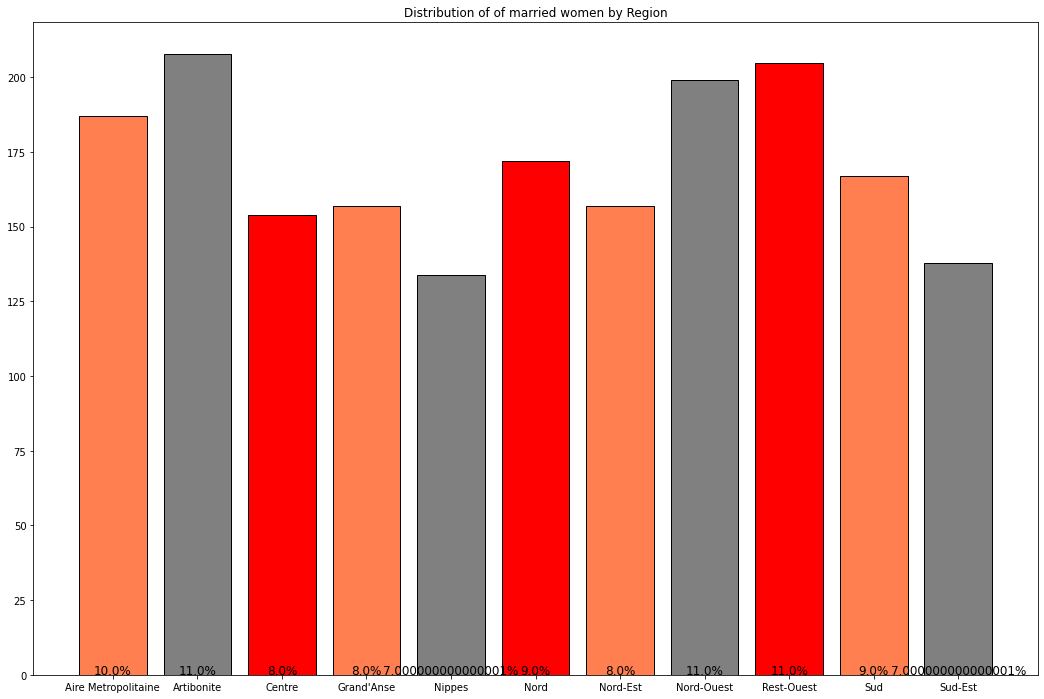

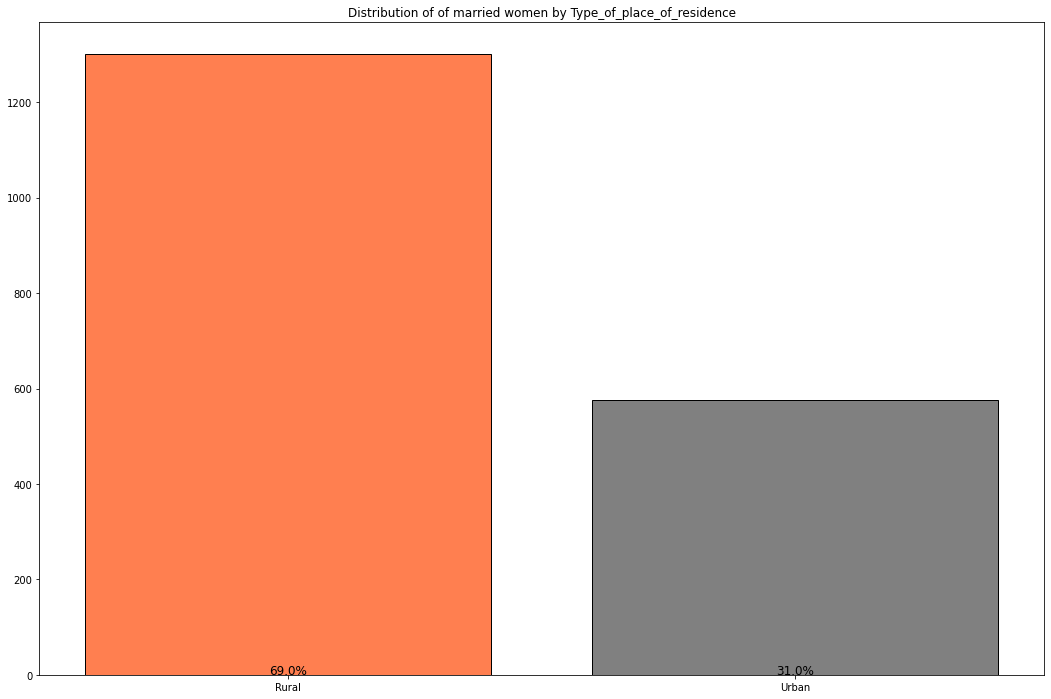

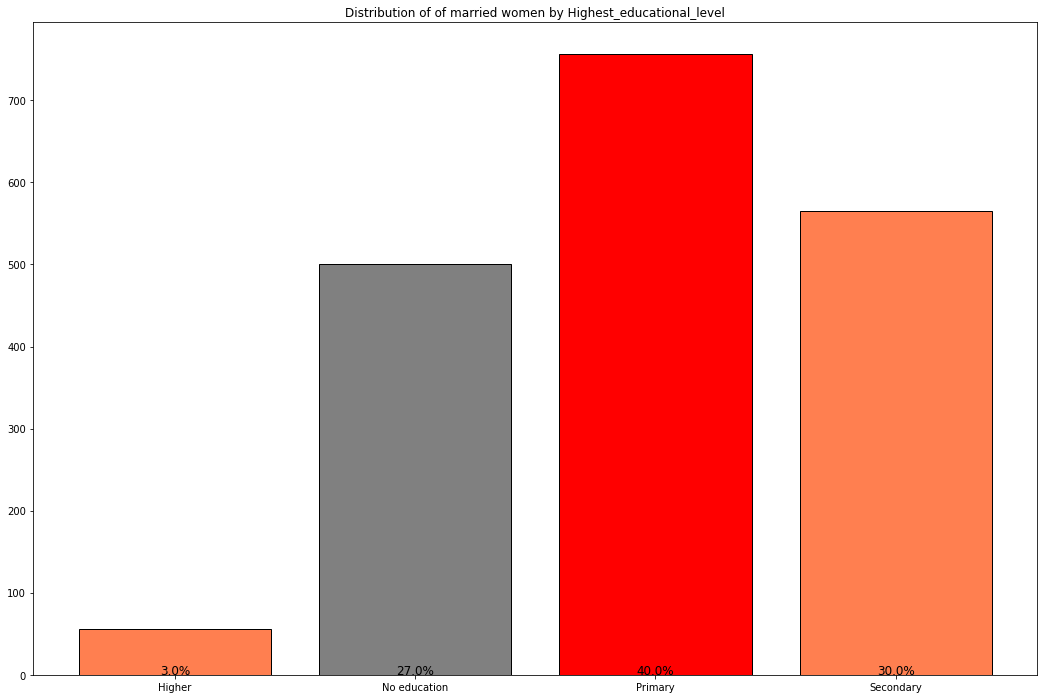

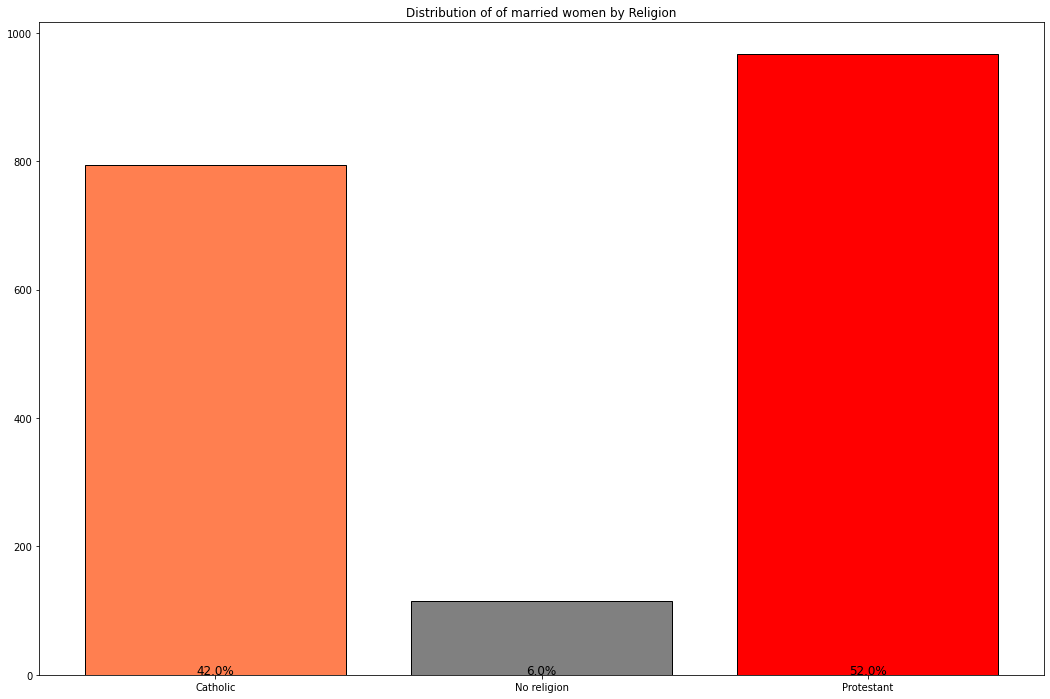

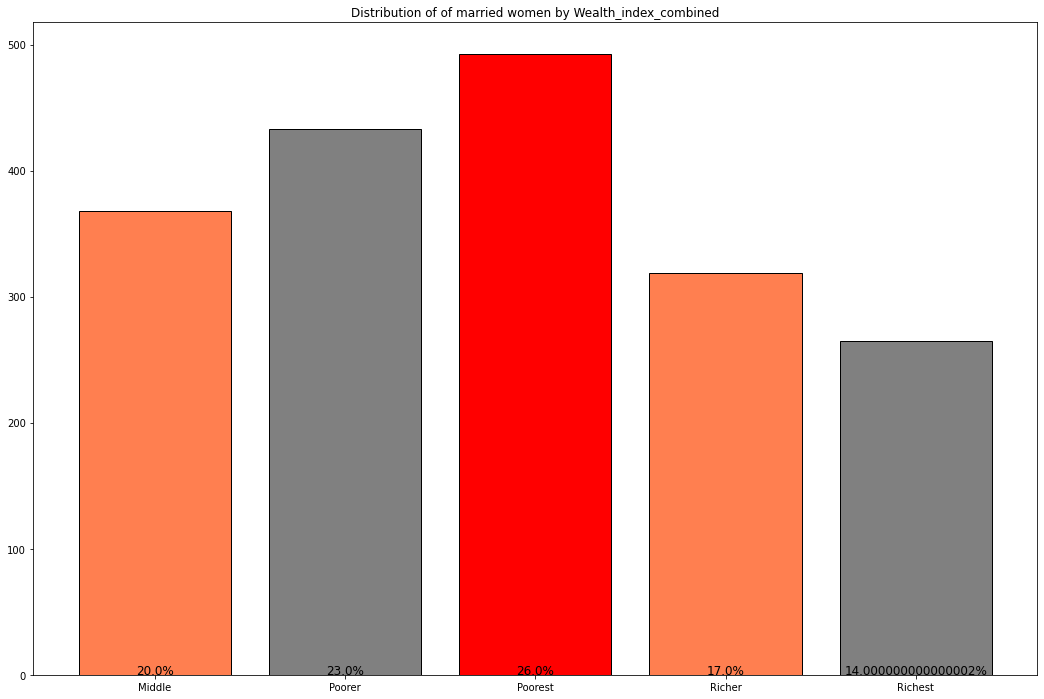

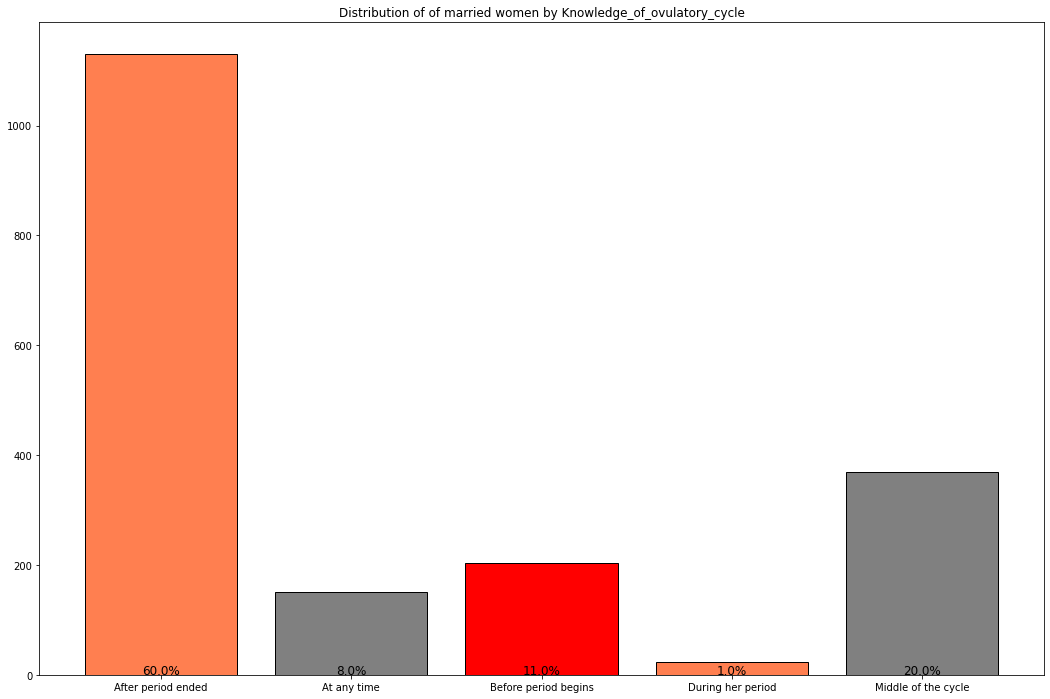

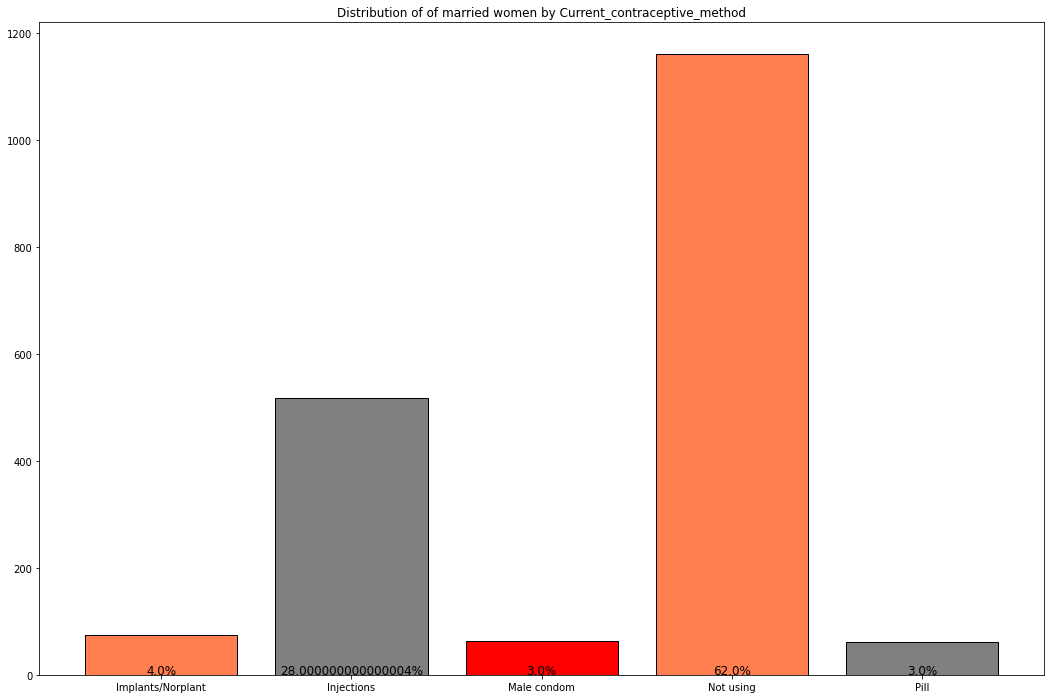

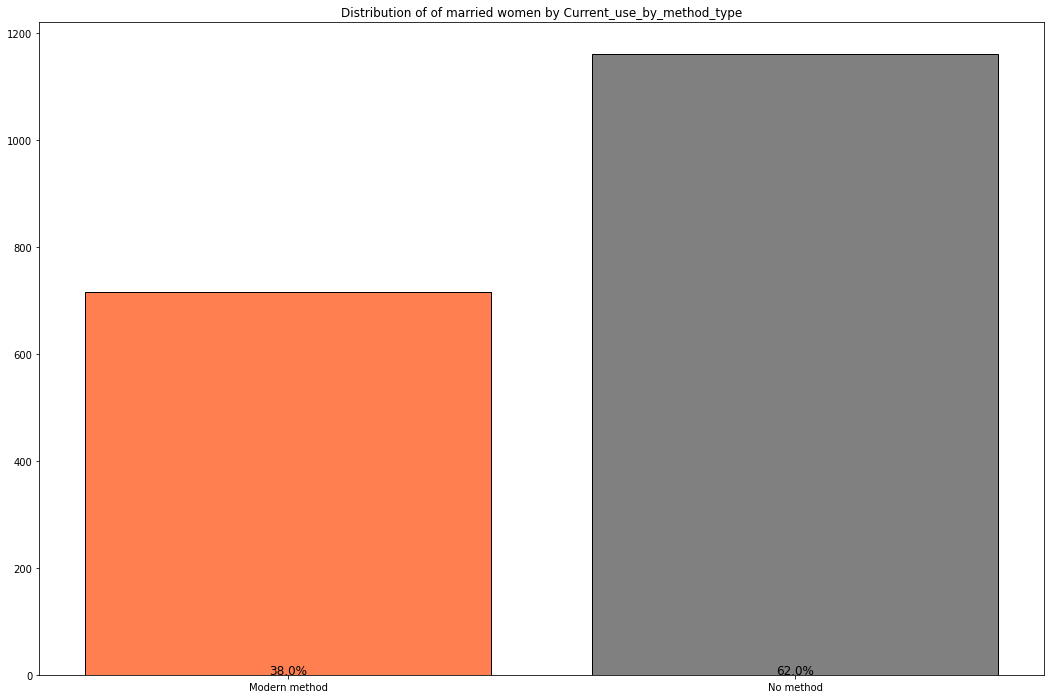

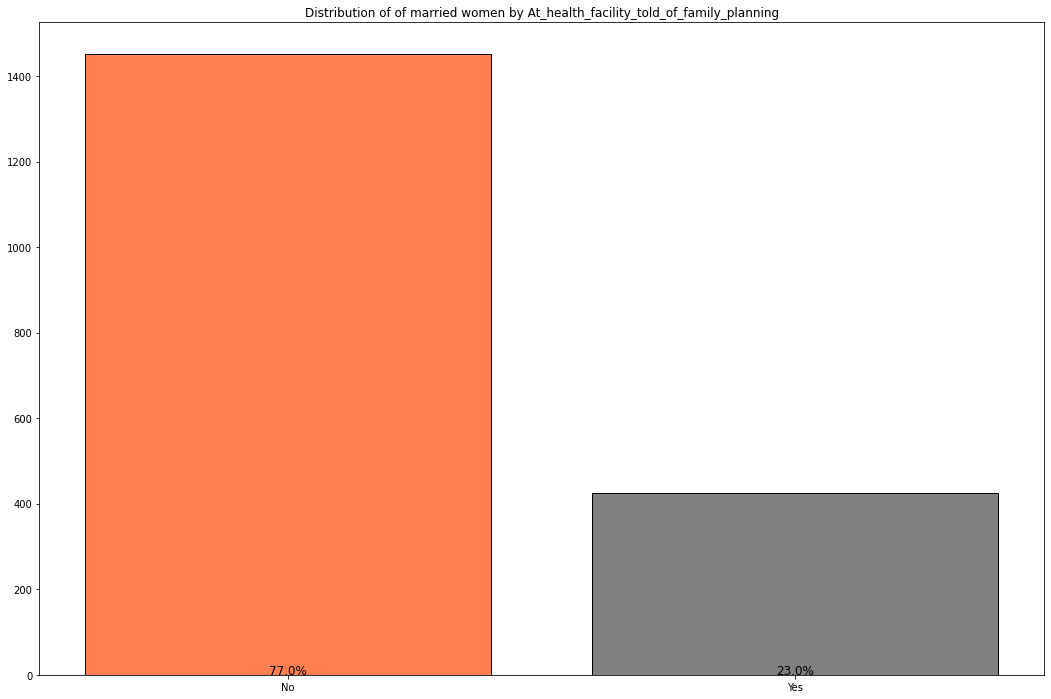

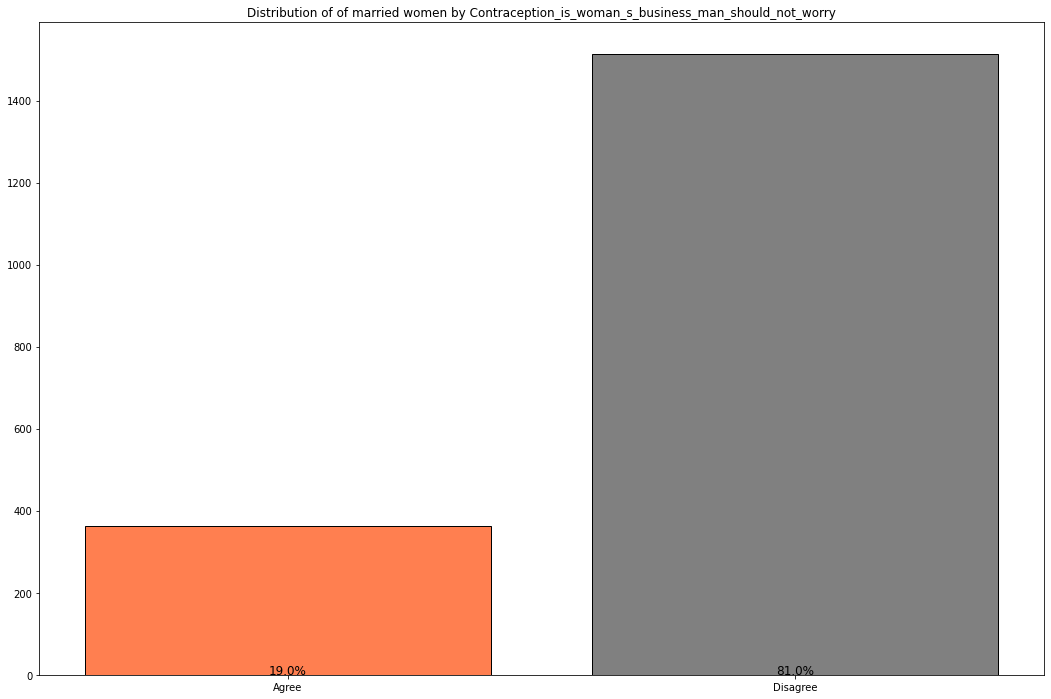

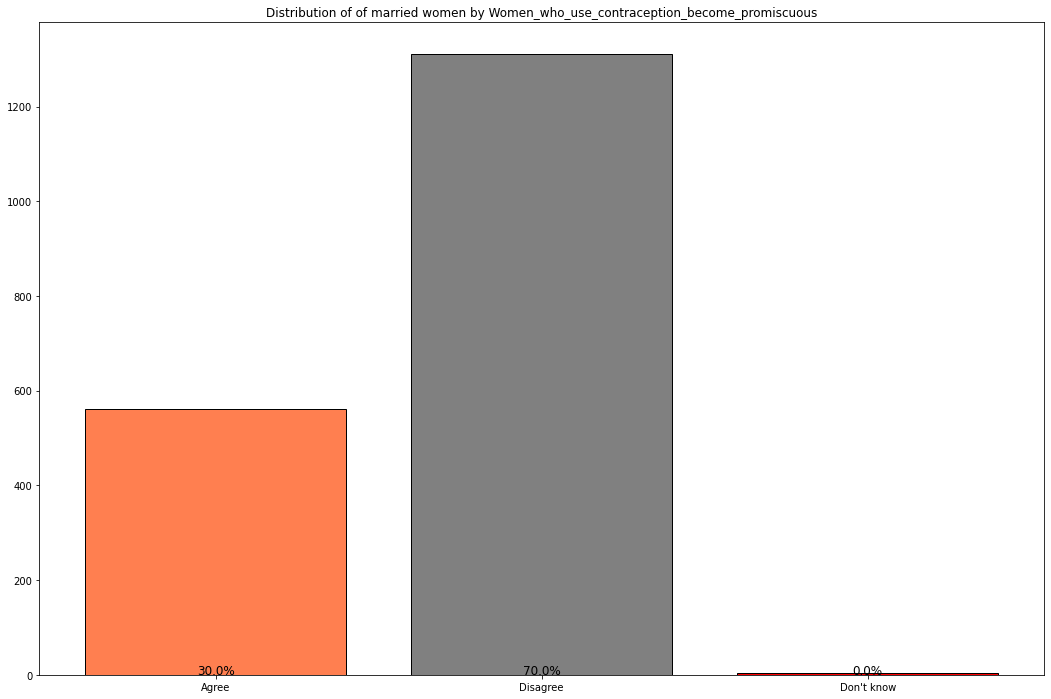

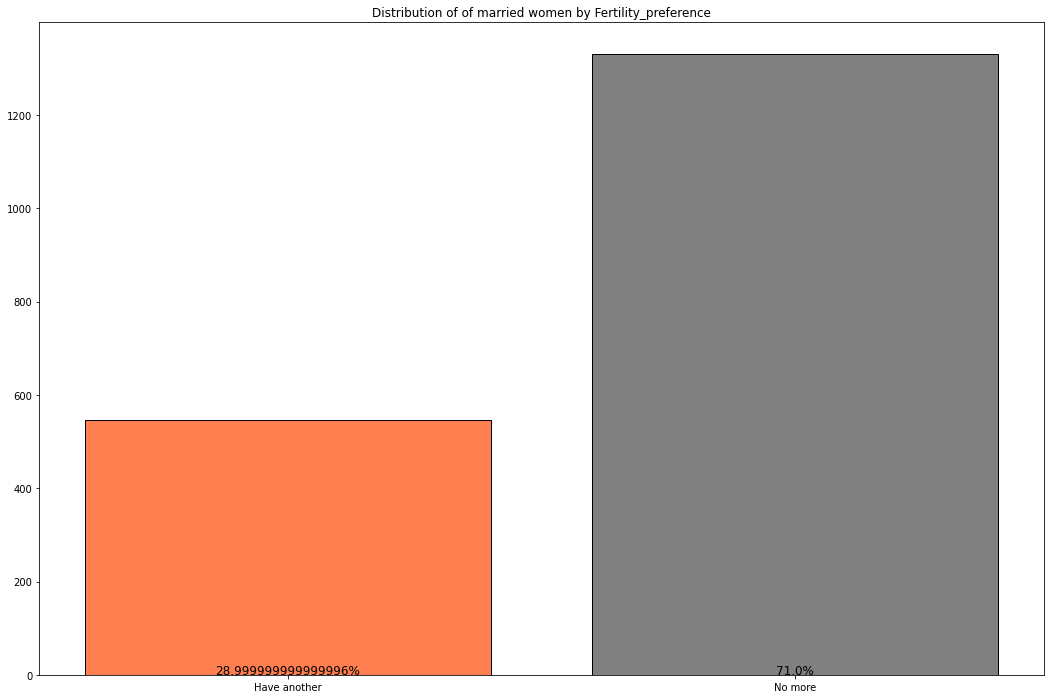

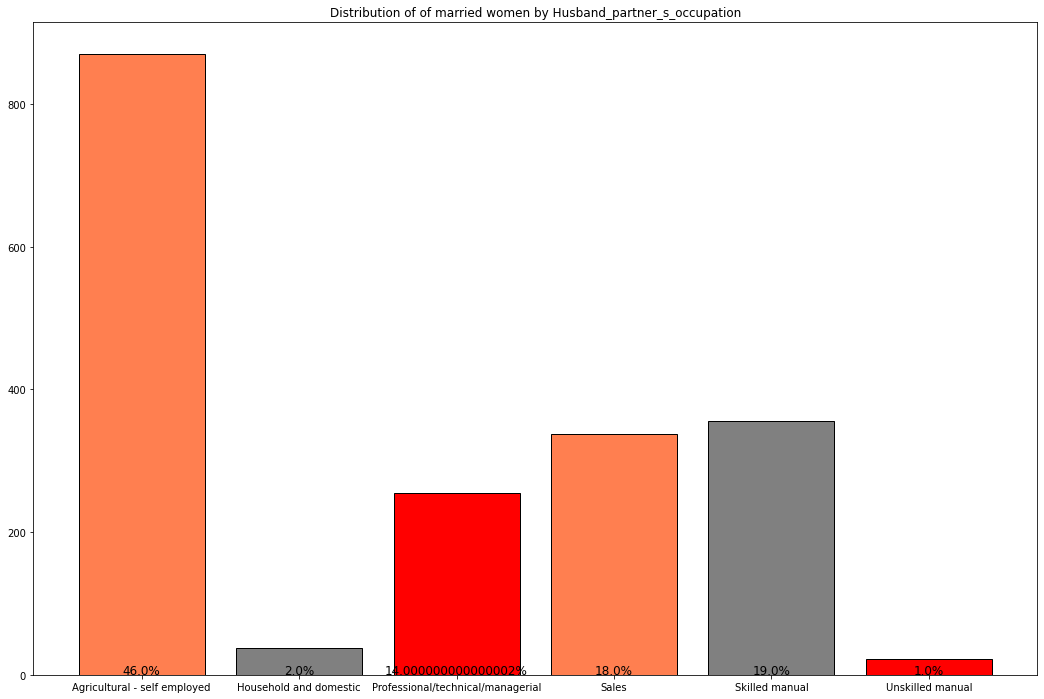

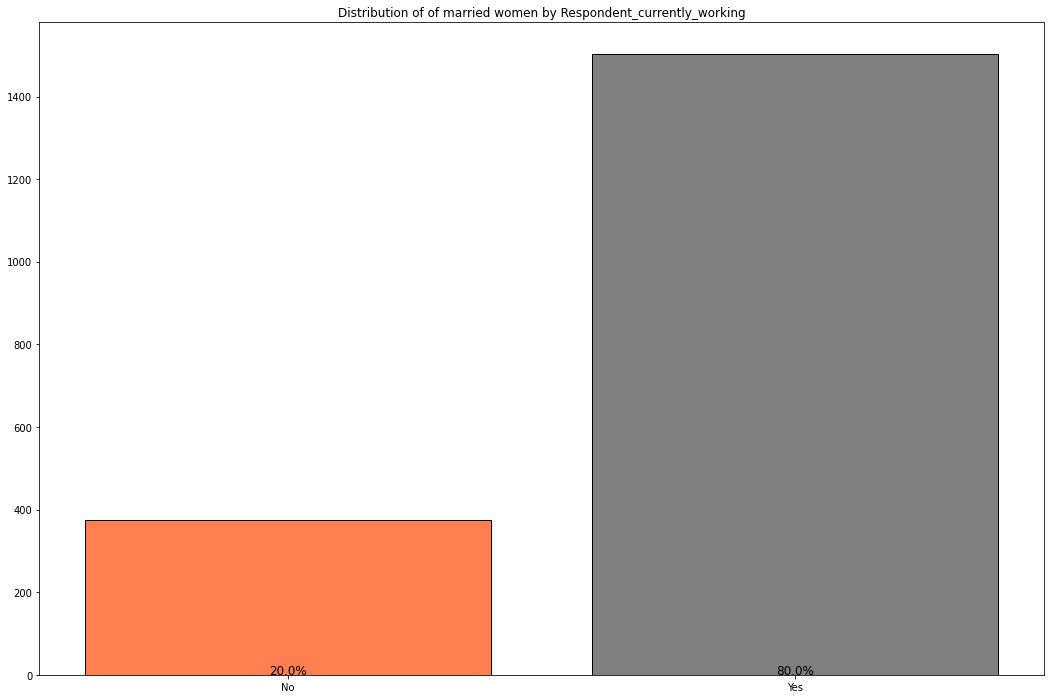

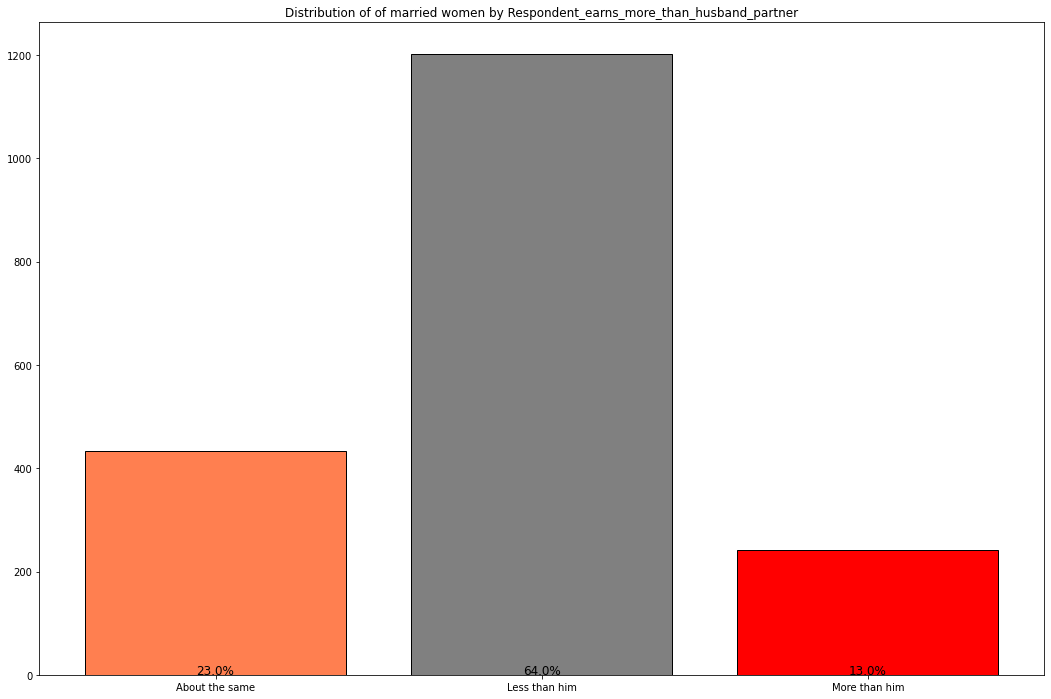

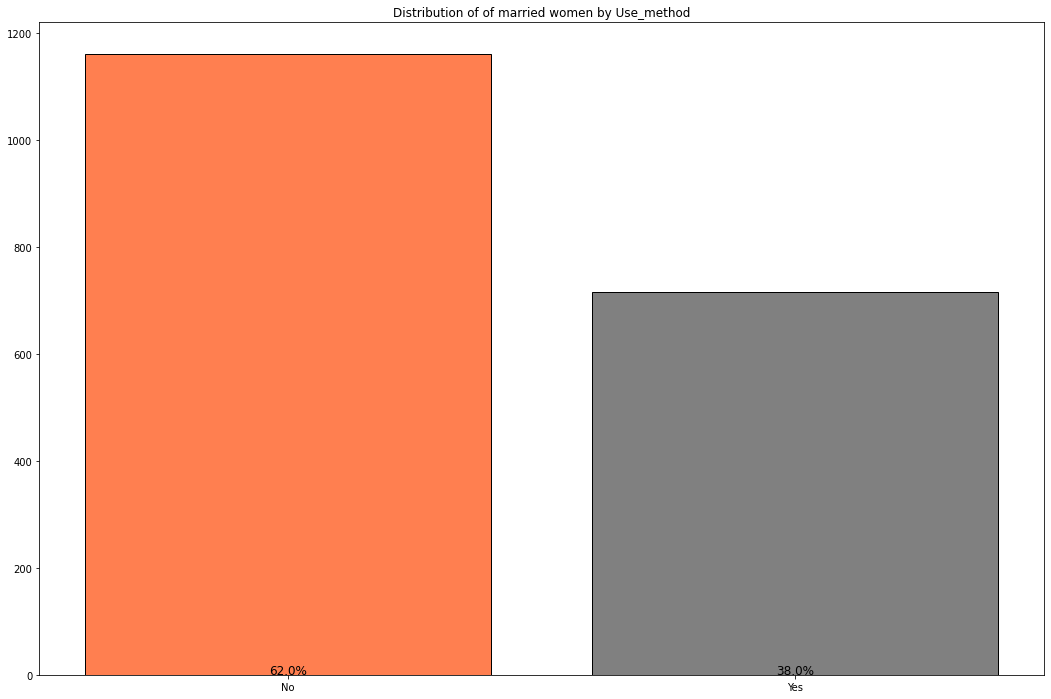

In [1487]:
# Let's plot categoric variable
for col in cat_cols:
  display(custo(col))

In [1488]:
# Descriptive Analysis of numeric variables
num_cols = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]
num_cols

['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Husband_partner_s_age',
 'Total_lifetime_number_of_sex_partners']

In [1489]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Respondent_s_current_age,1878.00,34.83,7.71,18.00,29.00,35.00,41.00,49.00
Number_of_household_members,1878.00,5.70,2.19,2.00,4.00,5.00,7.00,19.00
Number_of_children_5_and_under_in_household,1878.00,1.02,0.91,0.00,0.00,1.00,2.00,7.00
Age_of_respondent_at_1st_birth,1878.00,20.89,4.40,11.00,18.00,20.00,23.00,39.00
Number_of_living_children,1878.00,3.43,2.12,1.00,2.00,3.00,5.00,12.00
Age_at_first_cohabitation,1878.00,20.93,4.76,10.00,18.00,20.00,24.00,42.00
Years_since_first_cohabitation,1878.00,13.44,7.93,0.00,7.00,13.00,19.00,34.00
Husband_partner_s_age,1878.00,40.38,9.07,20.00,33.00,40.00,47.00,64.00
Total_lifetime_number_of_sex_partners,1878.00,2.27,1.55,1.00,1.00,2.00,3.00,22.00


* Let's plot histogram for numeric variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f664a1d06d0>,
      dtype=object)

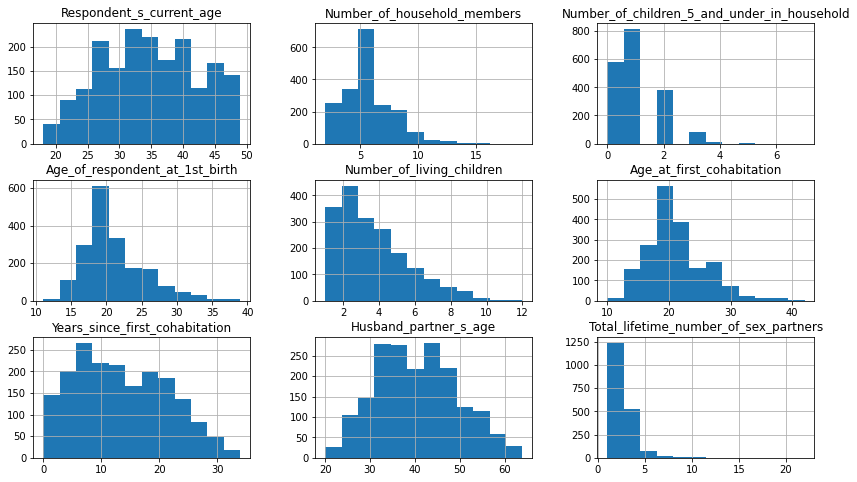

In [1490]:
# Let's plot numeric variable
df[num_cols].hist(figsize = (14,8), bins=12)

AxesSubplot(0.125,0.125;0.775x0.755)


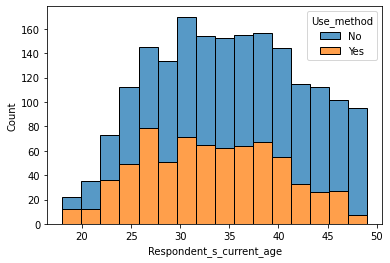

In [1491]:
print(sns.histplot(data=df, x="Respondent_s_current_age", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


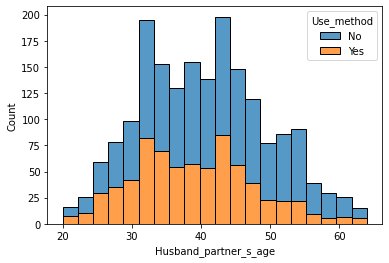

In [1492]:
print(sns.histplot(data=df, x="Husband_partner_s_age", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


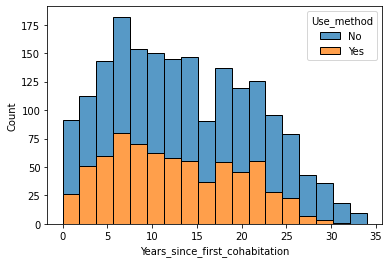

In [1493]:
print(sns.histplot(data=df, x="Years_since_first_cohabitation", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


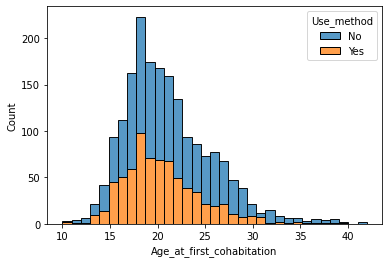

In [1494]:
print(sns.histplot(data=df, x="Age_at_first_cohabitation", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


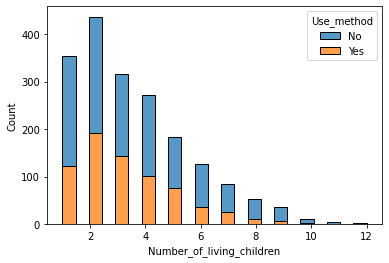

In [1495]:
print(sns.histplot(data=df, x="Number_of_living_children", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


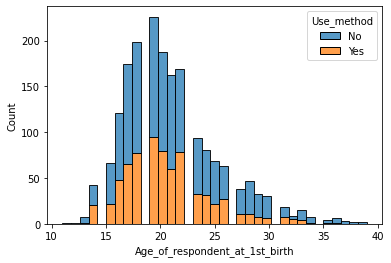

In [1496]:
print(sns.histplot(data=df, x="Age_of_respondent_at_1st_birth", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


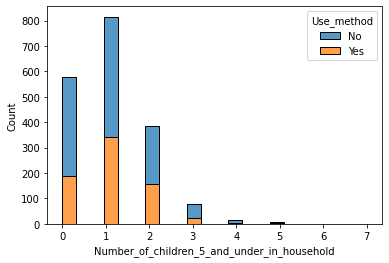

In [1497]:
print(sns.histplot(data=df, x="Number_of_children_5_and_under_in_household", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


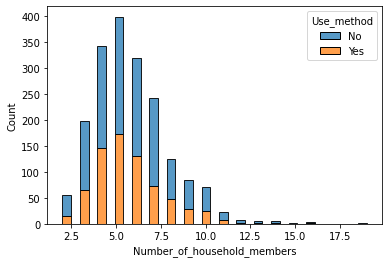

In [1498]:
print(sns.histplot(data=df, x="Number_of_household_members", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


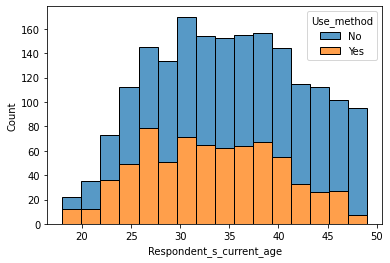

In [1499]:
print(sns.histplot(data=df, x="Respondent_s_current_age", hue="Use_method", multiple="stack"))

In [1500]:
cat_cols = [col for col in data.columns if data[col].dtype=="object"]
df = pd.get_dummies(df, columns = cat_cols, prefix_sep='_', drop_first = True)

In [1501]:
sc = StandardScaler()
sc.fit(df[['Total_lifetime_number_of_sex_partners','Years_since_first_cohabitation','Years_since_first_cohabitation','Age_at_first_cohabitation','Number_of_living_children','Age_of_respondent_at_1st_birth','Husband_partner_s_age','Respondent_s_current_age','Number_of_household_members','Number_of_children_5_and_under_in_household']])
values_std = sc.transform(df[['Total_lifetime_number_of_sex_partners','Years_since_first_cohabitation','Years_since_first_cohabitation','Age_at_first_cohabitation','Number_of_living_children','Age_of_respondent_at_1st_birth','Husband_partner_s_age','Respondent_s_current_age','Number_of_household_members','Number_of_children_5_and_under_in_household']])
values_std = pd.DataFrame(values_std, columns=['Total_lifetime_number_of_sex_partners','Years_since_first_cohabitation','Years_since_first_cohabitation','Age_at_first_cohabitation','Number_of_living_children','Age_of_respondent_at_1st_birth','Husband_partner_s_age','Respondent_s_current_age','Number_of_household_members','Number_of_children_5_and_under_in_household'])
df.drop(['Total_lifetime_number_of_sex_partners','Years_since_first_cohabitation','Years_since_first_cohabitation','Age_at_first_cohabitation','Number_of_living_children','Age_of_respondent_at_1st_birth','Husband_partner_s_age','Respondent_s_current_age','Number_of_household_members','Number_of_children_5_and_under_in_household'], axis = 1, inplace = True)
df = pd.concat([df, values_std], axis=1)

In [1502]:
df.head()

,Region,Type_of_place_of_residence,Highest_educational_level,Religion,Wealth_index_combined,Knowledge_of_ovulatory_cycle,Current_contraceptive_method,Current_use_by_method_type,At_health_facility_told_of_family_planning,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Fertility_preference,Husband_partner_s_occupation,Respondent_currently_working,Respondent_earns_more_than_husband_partner,Use_method,Total_lifetime_number_of_sex_partners,Years_since_first_cohabitation,Years_since_first_cohabitation,Age_at_first_cohabitation,Number_of_living_children,Age_of_respondent_at_1st_birth,Husband_partner_s_age,Respondent_s_current_age,Number_of_household_members,Number_of_children_5_and_under_in_household
0,Sud,Rural,Primary,Catholic,Middle,After period ended,Not using,No method,No,Disagree,Disagree,No more,Professional/technical/managerial,Yes,About the same,No,-0.18,-1.19,-1.19,1.28,-0.20,-0.43,-1.04,-0.50,-0.78,1.08
1,Sud,Rural,Higher,Catholic,Middle,Middle of the cycle,Injections,Modern method,No,Agree,Disagree,No more,Professional/technical/managerial,Yes,Less than him,Yes,-0.18,-0.69,-0.69,1.70,-0.67,2.30,-0.15,0.41,-0.32,-0.02
2,Sud,Rural,Secondary,Catholic,Middle,After period ended,Injections,Modern method,No,Disagree,Disagree,Have another,Skilled manual,Yes,Less than him,Yes,-0.18,-0.18,-0.18,0.23,-0.67,0.48,0.18,0.02,0.14,-1.13
3,Sud,Rural,Secondary,Catholic,Poorer,After period ended,Injections,Modern method,No,Agree,Agree,No more,Agricultural - self employed,No,Less than him,Yes,-0.18,0.70,0.70,-0.62,0.74,-0.66,1.39,0.28,0.59,-0.02
4,Aire Metropolitaine,Urban,Secondary,Catholic,Richest,After period ended,Not using,No method,No,Disagree,Disagree,No more,Professional/technical/managerial,Yes,Less than him,No,0.47,0.58,0.58,-0.20,-0.20,0.03,0.95,0.41,0.59,-1.13


In [1503]:
df=pd.get_dummies(df, drop_first=True)

In [1504]:
df.head()

,Total_lifetime_number_of_sex_partners,Years_since_first_cohabitation,Years_since_first_cohabitation,Age_at_first_cohabitation,Number_of_living_children,Age_of_respondent_at_1st_birth,Husband_partner_s_age,Respondent_s_current_age,Number_of_household_members,Number_of_children_5_and_under_in_household,Region_Artibonite,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Rest-Ouest,Region_Sud,Region_Sud-Est,Type_of_place_of_residence_Urban,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_No religion,Religion_Protestant,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Knowledge_of_ovulatory_cycle_At any time,Knowledge_of_ovulatory_cycle_Before period begins,Knowledge_of_ovulatory_cycle_During her period,Knowledge_of_ovulatory_cycle_Middle of the cycle,Current_contraceptive_method_Injections,Current_contraceptive_method_Male condom,Current_contraceptive_method_Not using,Current_contraceptive_method_Pill,Current_use_by_method_type_No method,At_health_facility_told_of_family_planning_Yes,Contraception_is_woman_s_business_man_should_not_worry_Disagree,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Fertility_preference_No more,Husband_partner_s_occupation_Household and domestic,Husband_partner_s_occupation_Professional/technical/managerial,Husband_partner_s_occupation_Sales,Husband_partner_s_occupation_Skilled manual,Husband_partner_s_occupation_Unskilled manual,Respondent_currently_working_Yes,Respondent_earns_more_than_husband_partner_Less than him,Respondent_earns_more_than_husband_partner_More than him,Use_method_Yes
0,-0.18,-1.19,-1.19,1.28,-0.20,-0.43,-1.04,-0.50,-0.78,1.08,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
1,-0.18,-0.69,-0.69,1.70,-0.67,2.30,-0.15,0.41,-0.32,-0.02,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,1
2,-0.18,-0.18,-0.18,0.23,-0.67,0.48,0.18,0.02,0.14,-1.13,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1
3,-0.18,0.70,0.70,-0.62,0.74,-0.66,1.39,0.28,0.59,-0.02,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,0.47,0.58,0.58,-0.20,-0.20,0.03,0.95,0.41,0.59,-1.13,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,0


Text(0.5, 1.0, 'Correlation HeatMap')

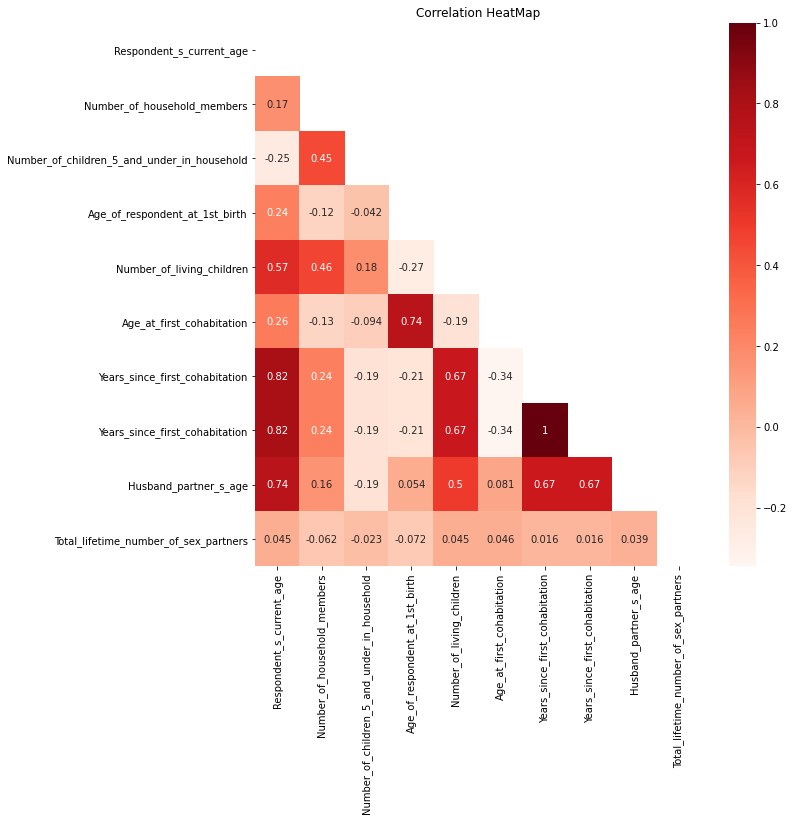

In [1505]:
# creating mask
mask = np.triu(np.ones_like(df[num_cols].corr()))
 
# display size
plt.figure(figsize=(10,10))
  
# plotting a triangle correlation heatmap
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Reds', mask=mask)
# display title
plt.title('Correlation HeatMap')

In [1506]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [1507]:
df.dropna(inplace = True)
X = df.drop('Use_method_Yes', axis=1)
y = df['Use_method_Yes']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

In [1508]:
original_ytrain.value_counts()

0    930
1    573
Name: Use_method_Yes, dtype: int64

In [1509]:
original_ytest.value_counts()

0    232
1    143
Name: Use_method_Yes, dtype: int64

In [1510]:
#Moving on to model building
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
Yes_df = df.loc[df['Use_method_Yes'] == 1]
No_df = df.loc[df['Use_method_Yes'] == 0][:1086]

normal_distributed_df = pd.concat([Yes_df, No_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df['Use_method_Yes'] = new_df['Use_method_Yes'].astype(int)
new_df.head()

,Total_lifetime_number_of_sex_partners,Years_since_first_cohabitation,Years_since_first_cohabitation,Age_at_first_cohabitation,Number_of_living_children,Age_of_respondent_at_1st_birth,Husband_partner_s_age,Respondent_s_current_age,Number_of_household_members,Number_of_children_5_and_under_in_household,Region_Artibonite,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Rest-Ouest,Region_Sud,Region_Sud-Est,Type_of_place_of_residence_Urban,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_No religion,Religion_Protestant,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Knowledge_of_ovulatory_cycle_At any time,Knowledge_of_ovulatory_cycle_Before period begins,Knowledge_of_ovulatory_cycle_During her period,Knowledge_of_ovulatory_cycle_Middle of the cycle,Current_contraceptive_method_Injections,Current_contraceptive_method_Male condom,Current_contraceptive_method_Not using,Current_contraceptive_method_Pill,Current_use_by_method_type_No method,At_health_facility_told_of_family_planning_Yes,Contraception_is_woman_s_business_man_should_not_worry_Disagree,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Fertility_preference_No more,Husband_partner_s_occupation_Household and domestic,Husband_partner_s_occupation_Professional/technical/managerial,Husband_partner_s_occupation_Sales,Husband_partner_s_occupation_Skilled manual,Husband_partner_s_occupation_Unskilled manual,Respondent_currently_working_Yes,Respondent_earns_more_than_husband_partner_Less than him,Respondent_earns_more_than_husband_partner_More than him,Use_method_Yes
1114,-0.18,1.33,1.33,-0.62,0.27,-0.66,0.51,0.93,-0.32,-0.02,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0
905,-0.18,-0.94,-0.94,-0.20,-1.14,-0.20,-0.93,-1.15,-1.23,-1.13,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
140,0.47,-0.81,-0.81,1.07,-0.67,0.25,0.07,-0.11,-0.32,-1.13,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0
881,-0.82,-0.81,-0.81,0.02,0.27,0.03,-0.81,-0.89,-0.32,2.19,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,1,0,1
114,-0.18,-0.31,-0.31,-0.62,0.27,-0.43,-0.81,-0.76,0.14,1.08,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0


Text(0.5, 1.0, 'Correlation HeatMap')

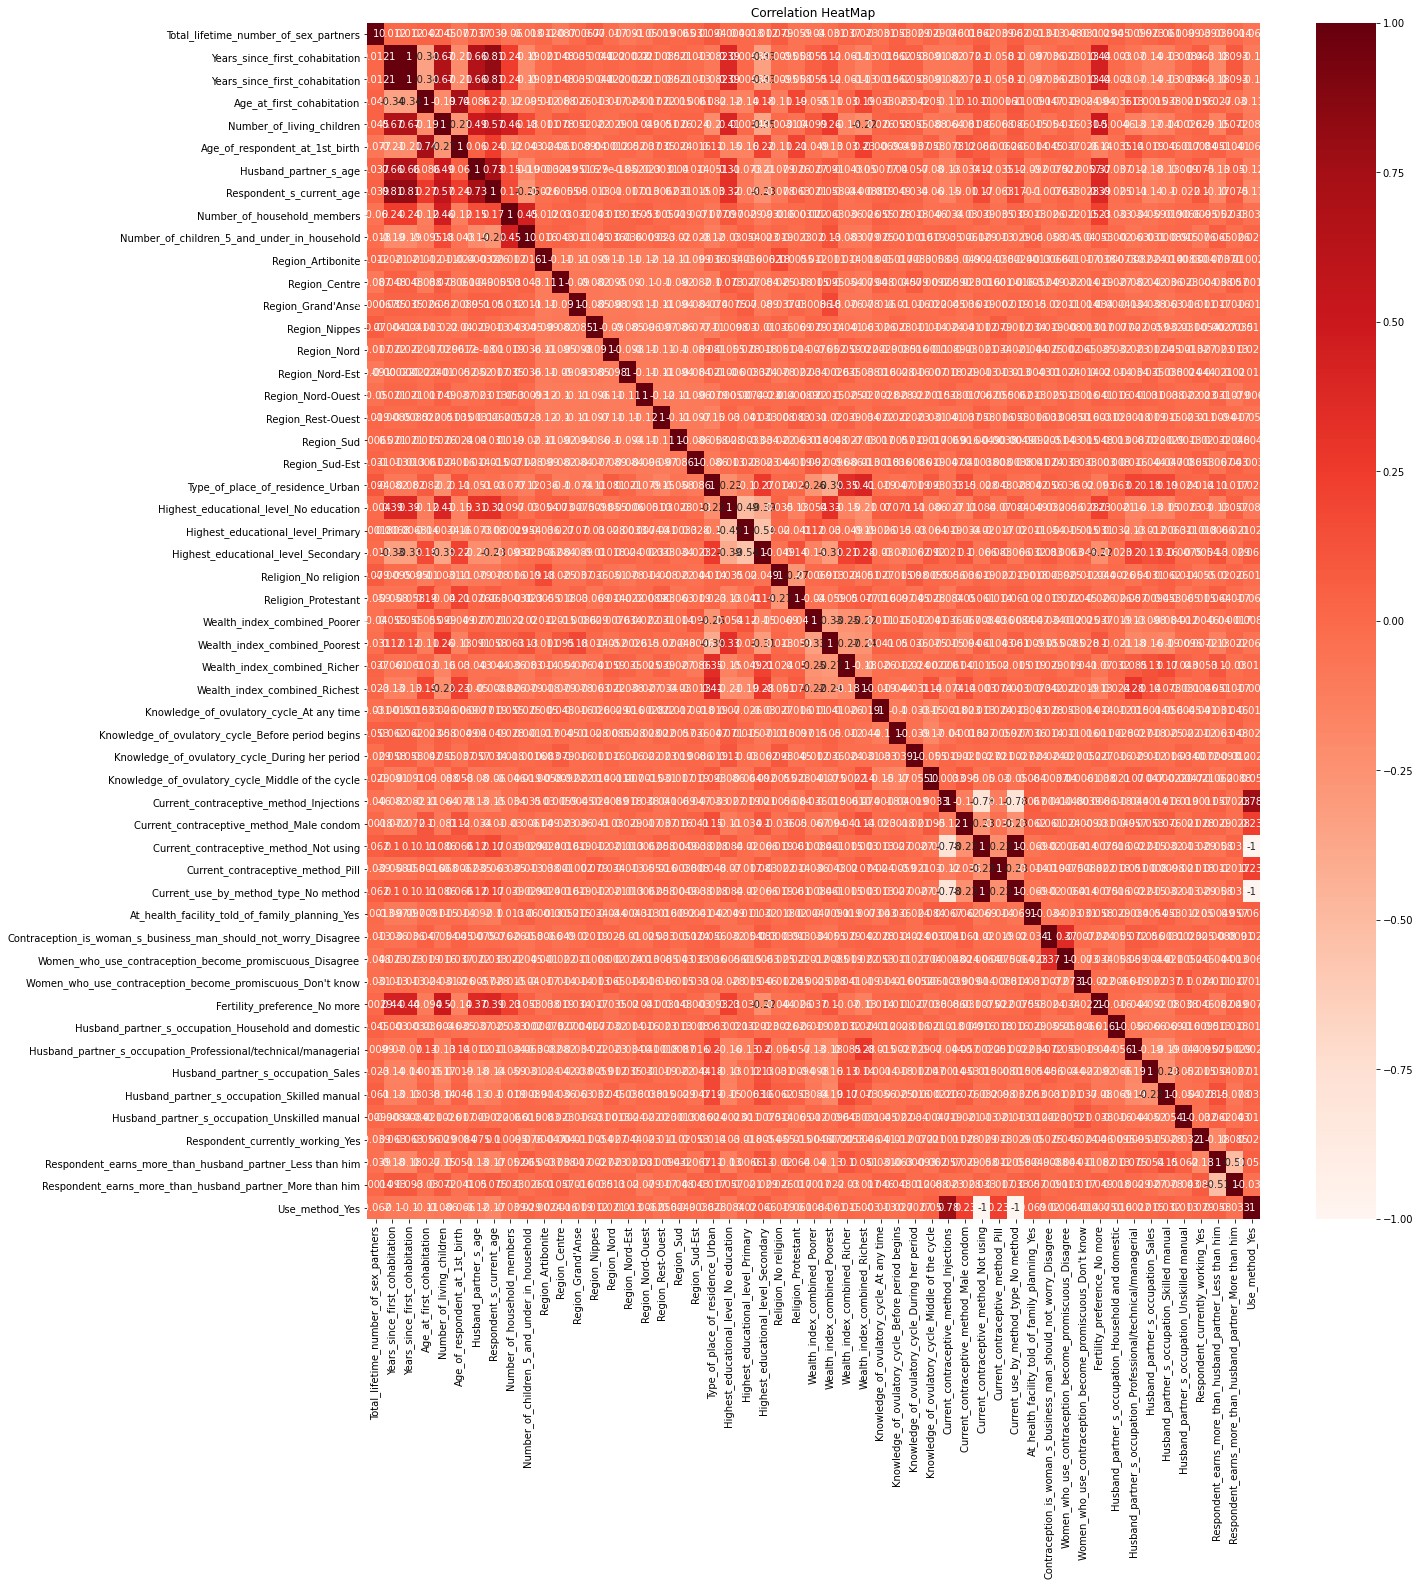

In [1511]:
# creating mask
mask = np.triu(np.ones_like(new_df.corr()))
 
# display size
plt.figure(figsize=(20,22))
  
# plotting a triangle correlation heatmap
sns.heatmap(new_df.corr(), annot=True, cmap='Reds')
# display title
plt.title('Correlation HeatMap')

In [1512]:
import statsmodels.api as sm
X = new_df.drop('Use_method_Yes', axis=1)
y = new_df['Use_method_Yes']
logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary())

In [1513]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [1514]:
classifiers = {"DecisionTreeClassifier": DecisionTreeClassifier()}

In [1515]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


In [1516]:
tree_params = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"],
               "max_depth": list(range(2,8,1)), "min_samples_leaf": list(range(5,10,1)),
               "max_features": ['auto', 'sqrt', 'log2']}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print('Best Estimators: ', tree_clf)

Best Estimators:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [1517]:
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

DecisionTree Classifier Cross Validation Score 84.88%


In [1518]:
#Model creation
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       min_samples_leaf=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1519]:
y_pred_x = tree.predict(X_test)
print("Prone To Overfitting Results:\n")
print(classification_report(y_test, y_pred_x))

Prone To Overfitting Results:

              precision    recall  f1-score   support

           0       0.64      0.95      0.76       197
           1       0.86      0.36      0.51       164

    accuracy                           0.68       361
   macro avg       0.75      0.65      0.64       361
weighted avg       0.74      0.68      0.65       361



In [1528]:
y_pred = tree.predict(original_Xtest)
print("Accurate Results using Undersampling Technique:\n")
print( classification_report(original_ytest, y_pred))

Accurate Results using Undersampling Technique:

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       232
           1       0.89      0.40      0.55       143

    accuracy                           0.75       375
   macro avg       0.81      0.68      0.69       375
weighted avg       0.79      0.75      0.72       375



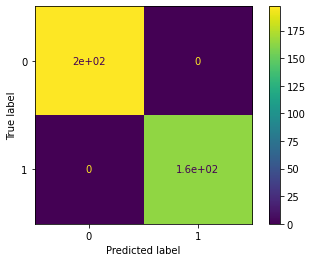

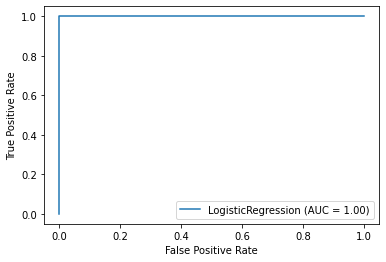

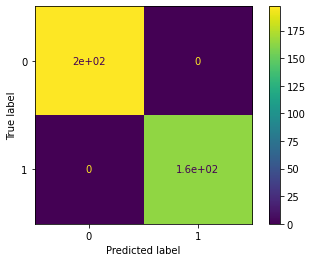

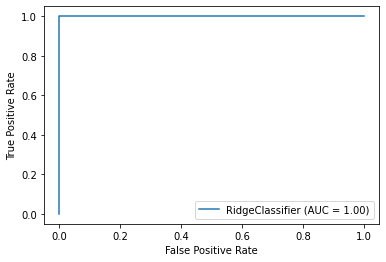

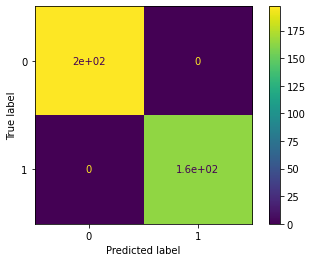

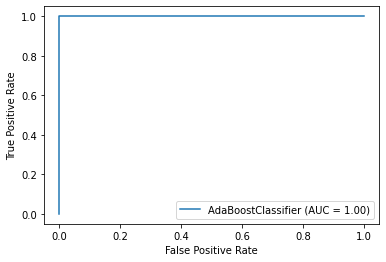

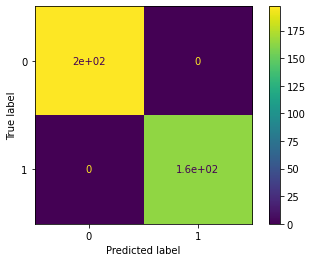

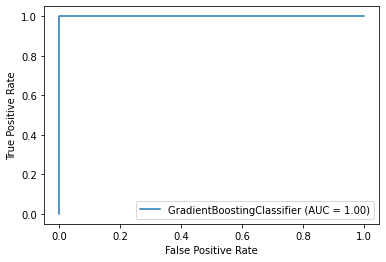

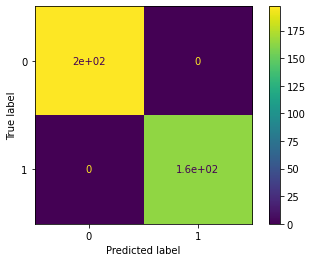

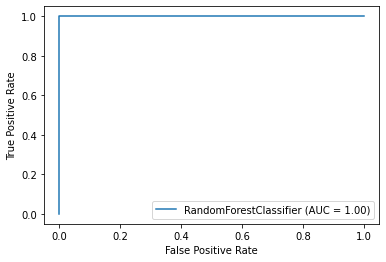

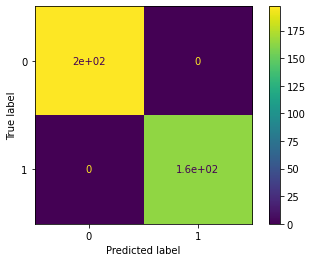

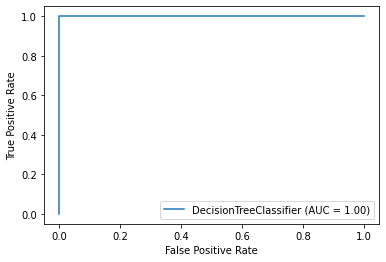

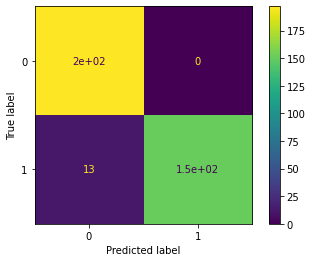

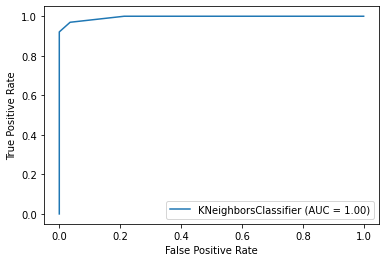

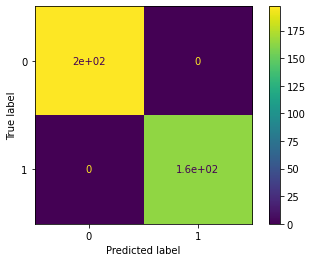

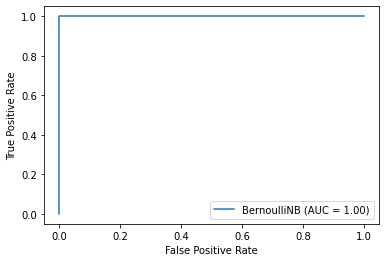

In [1529]:
# Let's a machine leraning model that fit the data
import time
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","NaiveBayes"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),BernoulliNB()]
for model in models:
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)

contrac = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [1530]:
contrac

,names,scores,times
0,LogisticRegression,1.00,0.04
1,RidgeClassifier,1.00,0.01
2,AdaBoostClassifier,1.00,0.01
3,GradientBoostingClassifier,1.00,0.13
4,RandomForestClassifier,1.00,0.18
5,DecisionTreeClassifier,1.00,0.00
6,KNeighborsClassifier,0.96,0.01
7,NaiveBayes,1.00,0.00


## Analyze

* The correlation matrix shows that there is :
    * high correlation between 'Respondent_s_current_age' and 'Years_since_first_cohabitation' (r=0.82)

    * high correlation between 'Respondent_s_current_age' and 'Husband_partner_s_age' (r=0.74)

    * high correlation between 'Age_of_respondent_at_1st_birth' and 'Age_at_first_cohabitation' (r=0.74)

    * high correlation between 'Years_since_first_cohabitation' and 'Age_of_respondent_at_1st_birth' (r=0.67)

 These correlations means they could have an identical impact on target variable);

    * We can drop Years_since_first_cohabitation and Husband_partner_s_age, Age_at_first_cohabitation from dataset;

In [1520]:
drop_list=['Years_since_first_cohabitation', 'Husband_partner_s_age', 'Age_at_first_cohabitation']

In [1521]:
df.drop(columns=drop_list, inplace=True)

In [1522]:
num_cols=[x for x in num_cols if x not in drop_list]

In [1523]:
num_cols

['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Total_lifetime_number_of_sex_partners']

##DATA TRANSFORMATION

In [1524]:
for col in df.columns:
  print(f'{col}', df[col].unique())

Total_lifetime_number_of_sex_partners [-0.17562372  1.11526219  1.76070515  2.40614811  0.46981923 -0.82106668
  4.98791994  3.69703402 12.73323543  3.05159107 11.44234951  4.34247698
  8.21513473]
Number_of_living_children [ 0.27027022 -1.14225521  0.74111203 -0.20057159  1.21195384 -0.6714134
  3.09532108  2.62447927  1.68279565  2.15363746  3.56616289  4.0370047 ]
Age_of_respondent_at_1st_birth [ 0.48050552 -0.65657785 -0.88399452  4.11917228  1.16275553  0.02567217
  0.93533886 -0.42916118 -0.2017445   1.61758888  2.07242223  0.25308884
  0.70792219 -1.11141119  3.20950559  2.75467224 -1.56624454  1.84500555
  2.2998389   1.39017221  3.43692226 -1.33882787  2.98208892  2.52725557
 -1.79366121 -2.02107789  3.89175561  3.66433894 -2.24849456]
Respondent_s_current_age [ 0.28138043 -0.10784062  0.41112078  1.57878394  0.67060148  0.54086113
  0.93008218 -0.62680202 -0.88628273  1.70852429 -0.75654237  1.31930323
 -1.53498448 -0.49706167  1.18956288 -1.40524413  1.05982253  0.02189973
 

In [1525]:
# categorical function to transform numeric columns
def cat_age(x, errors = "coerce"):
  if 18< x <=24:
    return '18-24'
  if 25 < x <= 31:
    return '25-31'
  if x > 32:
    return '+ 32'

''' bbbbbbbbb'''

def cat_memb(x, errors = "coerce"):
  if x < 4 :
    return 'Minus_than_4'
  if 4 <= x < 8:
    return '4-8'
  if x >= 8:
    return 'More_than_8'

''' bbbbbbbbb'''
def cat_lifetime(x, errors = "coerce"):
  if x < 3:
    return 'Minus_than_3'
  if 3 <= x < 8:
    return '3-8'
  if x >= 8:
    return 'More_than_8'

''' bbbbbbbbb'''
def cat_child(x, errors = "coerce"):
  if x < 2:
    return 'Minus_than_2'
  if 2 <= x < 4:
    return '2-4'
  if x >= 4:
    return 'More_than_4'

''' bbbbbbbbb'''
def cat_agebirth(x, errors = "coerce"):
  if x < 18:
    return 'Minus_than_18'
  if 18 <= x < 25:
    return '18-25'
  if x >= 25:
    return 'More_than_25'

''' bbbbbbbbb'''
def cat_livingchild(x, errors = "coerce"):
  if x < 2:
    return 'Minus_than_2'
  if 2 <= x < 4:
    return '2-4'
  if x >= 4:
    return 'More_than_4'

In [1526]:
df['Respondent_s_current_age']=df['Respondent_s_current_age'].apply(cat_age)
df['Number_of_household_members']=df['Number_of_household_members'].apply(cat_memb)
df['Total_lifetime_number_of_sex_partners']=df['Total_lifetime_number_of_sex_partners'].apply(cat_lifetime)
df['Number_of_children_5_and_under_in_household']=df['Number_of_children_5_and_under_in_household'].apply(cat_child)
df['Age_of_respondent_at_1st_birth']=df['Age_of_respondent_at_1st_birth'].apply(cat_agebirth)
df['Number_of_living_children']=df['Number_of_living_children'].apply(cat_livingchild)
df.head()

,Total_lifetime_number_of_sex_partners,Number_of_living_children,Age_of_respondent_at_1st_birth,Respondent_s_current_age,Number_of_household_members,Number_of_children_5_and_under_in_household,Region_Artibonite,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Rest-Ouest,Region_Sud,Region_Sud-Est,Type_of_place_of_residence_Urban,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_No religion,Religion_Protestant,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Knowledge_of_ovulatory_cycle_At any time,Knowledge_of_ovulatory_cycle_Before period begins,Knowledge_of_ovulatory_cycle_During her period,Knowledge_of_ovulatory_cycle_Middle of the cycle,Current_contraceptive_method_Injections,Current_contraceptive_method_Male condom,Current_contraceptive_method_Not using,Current_contraceptive_method_Pill,Current_use_by_method_type_No method,At_health_facility_told_of_family_planning_Yes,Contraception_is_woman_s_business_man_should_not_worry_Disagree,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Fertility_preference_No more,Husband_partner_s_occupation_Household and domestic,Husband_partner_s_occupation_Professional/technical/managerial,Husband_partner_s_occupation_Sales,Husband_partner_s_occupation_Skilled manual,Husband_partner_s_occupation_Unskilled manual,Respondent_currently_working_Yes,Respondent_earns_more_than_husband_partner_Less than him,Respondent_earns_more_than_husband_partner_More than him,Use_method_Yes
1122,Minus_than_3,Minus_than_2,Minus_than_18,None,Minus_than_4,Minus_than_2,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0
970,Minus_than_3,Minus_than_2,Minus_than_18,None,Minus_than_4,Minus_than_2,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1
1866,Minus_than_3,Minus_than_2,Minus_than_18,None,Minus_than_4,Minus_than_2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1
1715,Minus_than_3,Minus_than_2,Minus_than_18,None,Minus_than_4,Minus_than_2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0
1454,Minus_than_3,Minus_than_2,Minus_than_18,None,Minus_than_4,Minus_than_2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1


In [1527]:
# Replace and regrouppimg modalities
df['Husband_partner_s_occupation']=df['Husband_partner_s_occupation'].replace({"Professional/technical/managerial": "professional_technical_managerial", "Sales": "professional_technical_managerial", "Skilled manual": "professional_technical_managerial", 'Agricultural - self employed':'Agricultural_or_Self_employed','Household and domestic':'Domestic_Unskilled', "Unskilled manual": "Domestic_Unskilled"})
df['Husband_partner_s_occupation'].unique()

KeyError: ignored

In [ ]:
# count column values again
for col in df.columns:
  print(f"{col}={df[col].nunique()}")

In [ ]:
select=['Region','Religion','Type_of_place_of_residence','Highest_educational_level', 'Number_of_household_members','Number_of_children_5_and_under_in_household','Number_of_living_children','Age_of_respondent_at_1st_birth','At_health_facility_told_of_family_planning','Contraception_is_woman_s_business_man_should_not_worry','Women_who_use_contraception_become_promiscuous','Fertility_preference','Respondent_currently_working','Respondent_earns_more_than_husband_partner','Husband_partner_s_occupation','Wealth_index_combined','Knowledge_of_ovulatory_cycle','Current_contraceptive_method','Total_lifetime_number_of_sex_partners','Use_method']

In [ ]:
df[select].head()

In [ ]:
df1 = df[df['Use_method']=='Yes']
analiz = df1.groupby(by=['Use_method','Number_of_living_children','Fertility_preference']).size().to_frame()
analiz.columns = ['Total']
analiz['%'] = analiz/analiz.Total.sum()*100
analiz

In [ ]:
df.dtypes

In [ ]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

In [ ]:
multi_cols = [col for col in df.columns if df[col].nunique() > 2]
multi_cols

In [ ]:
df.columns

In [ ]:
for col in df.columns:
  if df[col].dtype == "object":
    df[col] = df[col].astype('category')

In [ ]:
df.info()

In [ ]:
df['Use_method'] = np.where(df['Use_method'] == 'Yes', 1, 0)

In [ ]:
plt.figure(figsize=(20,6))
(pd.get_dummies(df).corr()['Use_method']).sort_values(ascending=False).plot(kind='bar');

## BIVARIATE

In [ ]:

#draw bar plot for insights from categorical variables
cate_cols = ['Respondent_s_current_age', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Fertility_preference',
       'Husband_partner_s_occupation', 'Respondent_currently_working', 'Respondent_earns_more_than_husband_partner',
       'Total_lifetime_number_of_sex_partners']
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 7,ncols = 2,figsize = (15,40))

for i,feature in enumerate(cate_cols):
    if i < 7:
        ax = df.groupby([feature,'Use_method']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 7 and i < 14:
        ax = df.groupby([feature,'Use_method']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-7,1])
    
    ax.set_title("Distribution of {} and % Use_method".format(feature), fontsize = 10)
    ax.set_ylabel("Percentage", fontsize=15)
    ax.set_xlabel("{}".format(feature), fontsize=15)
    ax.legend(["No", "Yes"], fontsize=12)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# transform variables in dummies
data = pd.get_dummies(df)
data.head()

In [ ]:
# Function in order to transfrom df in numrical data only
def label_encoder(dataframe, cat_cols):
    labelencoder = preprocessing.LabelEncoder()
    dataframe[cat_cols] = labelencoder.fit_transform(dataframe[cat_cols])
    return dataframe

In [ ]:
data.columns

In [ ]:
selec=['Respondent_s_current_age_+ 32', 'Respondent_s_current_age_18-24', 'Respondent_s_current_age_25-31','Type_of_place_of_residence_Rural', 'Type_of_place_of_residence_Urban',
       'Highest_educational_level_Higher', 'Highest_educational_level_No education', 'Highest_educational_level_Primary',
       'Highest_educational_level_Secondary', 'Religion_Catholic', 'Religion_No religion', 'Religion_Protestant', 'Number_of_household_members_4-8',
       'Number_of_household_members_Minus_than_4', 'Number_of_household_members_More_than_8', 'Number_of_children_5_and_under_in_household_2-4',
       'Number_of_children_5_and_under_in_household_Minus_than_2', 'Number_of_children_5_and_under_in_household_More_than_4',
       'Wealth_index_combined_Middle', 'Wealth_index_combined_Poorer', 'Wealth_index_combined_Poorest', 'Wealth_index_combined_Richer',
       'Wealth_index_combined_Richest', 'Age_of_respondent_at_1st_birth_18-25', 'Age_of_respondent_at_1st_birth_Minus_than_18',
       'Age_of_respondent_at_1st_birth_More_than_25', 'Knowledge_of_ovulatory_cycle_After period ended', 'Knowledge_of_ovulatory_cycle_At any time',
       'Knowledge_of_ovulatory_cycle_Before period begins', 'Knowledge_of_ovulatory_cycle_During her period',
       'Knowledge_of_ovulatory_cycle_Middle of the cycle', 'Number_of_living_children_2-4', 'Number_of_living_children_Minus_than_2',
       'Number_of_living_children_More_than_4', 'At_health_facility_told_of_family_planning_No',
       'At_health_facility_told_of_family_planning_Yes', 'Contraception_is_woman_s_business_man_should_not_worry_Agree',
       'Contraception_is_woman_s_business_man_should_not_worry_Disagree', 'Women_who_use_contraception_become_promiscuous_Agree',
       'Women_who_use_contraception_become_promiscuous_Disagree', "Women_who_use_contraception_become_promiscuous_Don't know",
       'Fertility_preference_Have another', 'Fertility_preference_No more', 'Husband_partner_s_occupation_Agricultural_or_Self_employed',
       'Husband_partner_s_occupation_Domestic_Unskilled', 'Husband_partner_s_occupation_professional_technical_managerial',
       'Respondent_currently_working_No', 'Respondent_currently_working_Yes', 'Respondent_earns_more_than_husband_partner_About the same',
       'Respondent_earns_more_than_husband_partner_Less than him', 'Respondent_earns_more_than_husband_partner_More than him',
       'Total_lifetime_number_of_sex_partners_3-8', 'Total_lifetime_number_of_sex_partners_Minus_than_3',
       'Total_lifetime_number_of_sex_partners_More_than_8','Use_method']

In [ ]:
# Installing package for colored text
import sys
from termcolor import colored, cprint

In [ ]:
def chisq(df,name):
    stat, p, df, arr = chi2_contingency(pd.crosstab(df, data.Use_method))
    if p < 0.05:
      print(colored('We can reject the Null Hypothesis for {}  {}'.format(name, p),'red'))
    else: 
      print(colored('We fail to reject the Null Hypothesis for {} {}'.format(name, p),'green'))

In [ ]:
for i in data[selec].columns:
  chisq(data[i],i)

In [ ]:
selected=['Respondent_s_current_age_+ 32', 
          'Respondent_s_current_age_18-24',
          'Respondent_s_current_age_25-31',
          'Region_Rest-Ouest',
          'Highest_educational_level_No education',
          'Highest_educational_level_Secondary',
          'Religion_Catholic',
          'Religion_Protestant',
          'Number_of_household_members_4-8',
          'Number_of_household_members_Minus_than_4',
          'Wealth_index_combined_Poorest',
          'Age_of_respondent_at_1st_birth_18-25',
          'Age_of_respondent_at_1st_birth_More_than_25',
          'Number_of_living_children_2-4',
          'Number_of_living_children_More_than_4',
          'Knowledge_of_ovulatory_cycle_Middle of the cycle',
          'At_health_facility_told_of_family_planning_Yes',
          'At_health_facility_told_of_family_planning_No',
          'Respondent_earns_more_than_husband_partner_Less than him',
          'Total_lifetime_number_of_sex_partners_3-8',
          'Total_lifetime_number_of_sex_partners_Minus_than_3',
          'Use_method']

In [ ]:
contracep=data[selected]

In [ ]:
import statsmodels.api as sm
X = contracep.drop('Use_method', axis=1)
y = contracep['Use_method']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

In [ ]:
# reg=['Region_Rest-Ouest','Number_of_living_children_2-4','At_health_facility_told_of_family_planning_Yes','Use_method_Yes']

## MACHINE LEARNING

In [ ]:
# Let's split the dataset
X = contracep.drop('Use_method', axis=1)
y = contracep['Use_method']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state=2)
lr  = LogisticRegression()
lr.fit(X_train,y_train)

In [ ]:
# Let's a machine leraning model that fit the data
import time
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","NaiveBayes"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),BernoulliNB()]
for model in models:
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)

contraception = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [ ]:
# Table of machine learning models with high accuracy
contraception

In [ ]:
# Classification table
from sklearn.metrics import classification_report
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# Let's try to balance the data
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 5)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [ ]:
# Let's fit the model with the balanced data
lr  = LogisticRegression()
lr.fit(X_train_smote,y_train_smote)

In [ ]:
# Let's see how the new classification table would be with the balanced data
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=50)
lr  = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2'],'C':[1,2,3,4,5], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
param_grid = {'penalty':['l1','l2'],'C':[1,2,3,4,5], 'solver':['lbfgs']} 
   
grid = GridSearchCV(lr, param_grid, refit = True, verbose = 2,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_y_pred = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_y_pred))

### Further Analysis will come sooner